In [2]:
import umap

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

In [6]:
import sklearn

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# data

In [13]:
df = pd.read_hdf('../../results/pickled_featureset.h5', key='features')

In [14]:
cols_curv = list(df.filter(like='curv').columns)
for col in cols_curv[:5]:
    print(df[col].min(), df[col].max())
df[cols_curv] = Normalizer().fit_transform(df[cols_curv])
for col in cols_curv[:5]:
    print(df[col].min(), df[col].max())

-0.059539645312999566 0.05871345530160546
-0.06244590345058742 0.062117478931962046
-0.06922531544190588 0.06840727889079838
-0.07661850085623119 0.07652495089680433
-0.07947174618299574 0.0801736636984569
-0.9189910774042753 0.9471618940671575
-0.8544243150644738 0.8075086667245552
-0.7405931141552922 0.7530780020290355
-0.7255866578686605 0.7074596769472399
-0.8326120129350402 0.8012067420788704


In [16]:
sklearn.__version__

'1.2.2'

In [17]:
cols_speed = list(df.filter(like='speed').columns)
for col in cols_speed[:5]:
    print(df[col].min(), df[col].max())
df[cols_speed] = MinMaxScaler().fit_transform(df[cols_speed])
for col in cols_speed[:5]:
    print(df[col].min(), df[col].max())

0.0009999999999763531 4.343589529409949
0.0009999999999763531 4.23690984091001
0.0009999999999763531 4.3400297234004634
0.0009999999999763531 4.47162845057589
0.0009999999999763531 4.642884017504677
0.0 0.9999999999999999
0.0 0.9999999999999999
0.0 1.0
0.0 1.0
0.0 0.9999999999999999


In [18]:
df['len_sum_of_parts'] = pd.DataFrame(MinMaxScaler().fit_transform(df['len_sum_of_parts'].values.reshape(-1,1)), index=df.index)

In [19]:
df['quirkiness'] = pd.DataFrame(MinMaxScaler().fit_transform(df['quirkiness'].values.reshape(-1,1)), index=df.index)

In [ ]:
np.nanmin(df[cols_curv].values)

In [ ]:
np.nanmax(df[cols_curv].values)

In [37]:
df['MOUTH'] = df['MOUTH'].apply(lambda x: 1 if x==1 else -1)

In [38]:
df = df.fillna(value=-1)

In [171]:
df['speed_dorsal_avg'] = df.filter(like='speed_D').mean(axis = 1)

In [157]:
df['speed_ventral_avg'] = df.filter(like='speed_V').mean(axis = 1)

In [172]:
df_in = df[['curv_NT','len_sum_of_parts',
       'curv_DH1', 'curv_DH2', 'curv_DNP', 'curv_DTP1', 'curv_DTP2',
       'curv_DTP3', 'curv_DTP4', 'curv_DTP5', 'curv_DTP6', 'curv_DTP7',
       'curv_DTP8', 'curv_DTP9', 'curv_DTP10', 'curv_TT', 'quirkiness',
       'speed_NT', 'speed_dorsal_avg', 'speed_TT',
       'speed_ventral_avg', 'MOUTH']]

In [173]:
df_in.min().min(), df_in.max().max()

(-1.0, 1.0)

In [174]:
df_in.shape

(3407603, 22)

In [175]:
df.speed_DTP2.max()

1.0

# UMAP

In [236]:
weights_curv = np.exp(df_in.filter(like='speed_N').sum(axis=1))

In [253]:
df_sampled = df_in.sample(frac=0.05, weights= weights_curv)
df_sampled.shape

(170380, 22)

In [263]:
reducer = umap.UMAP(metric='cosine', n_neighbors=5, min_dist=0.01)

In [264]:
embedding = reducer.fit_transform(df_sampled.values)
embedding.shape

(170380, 2)

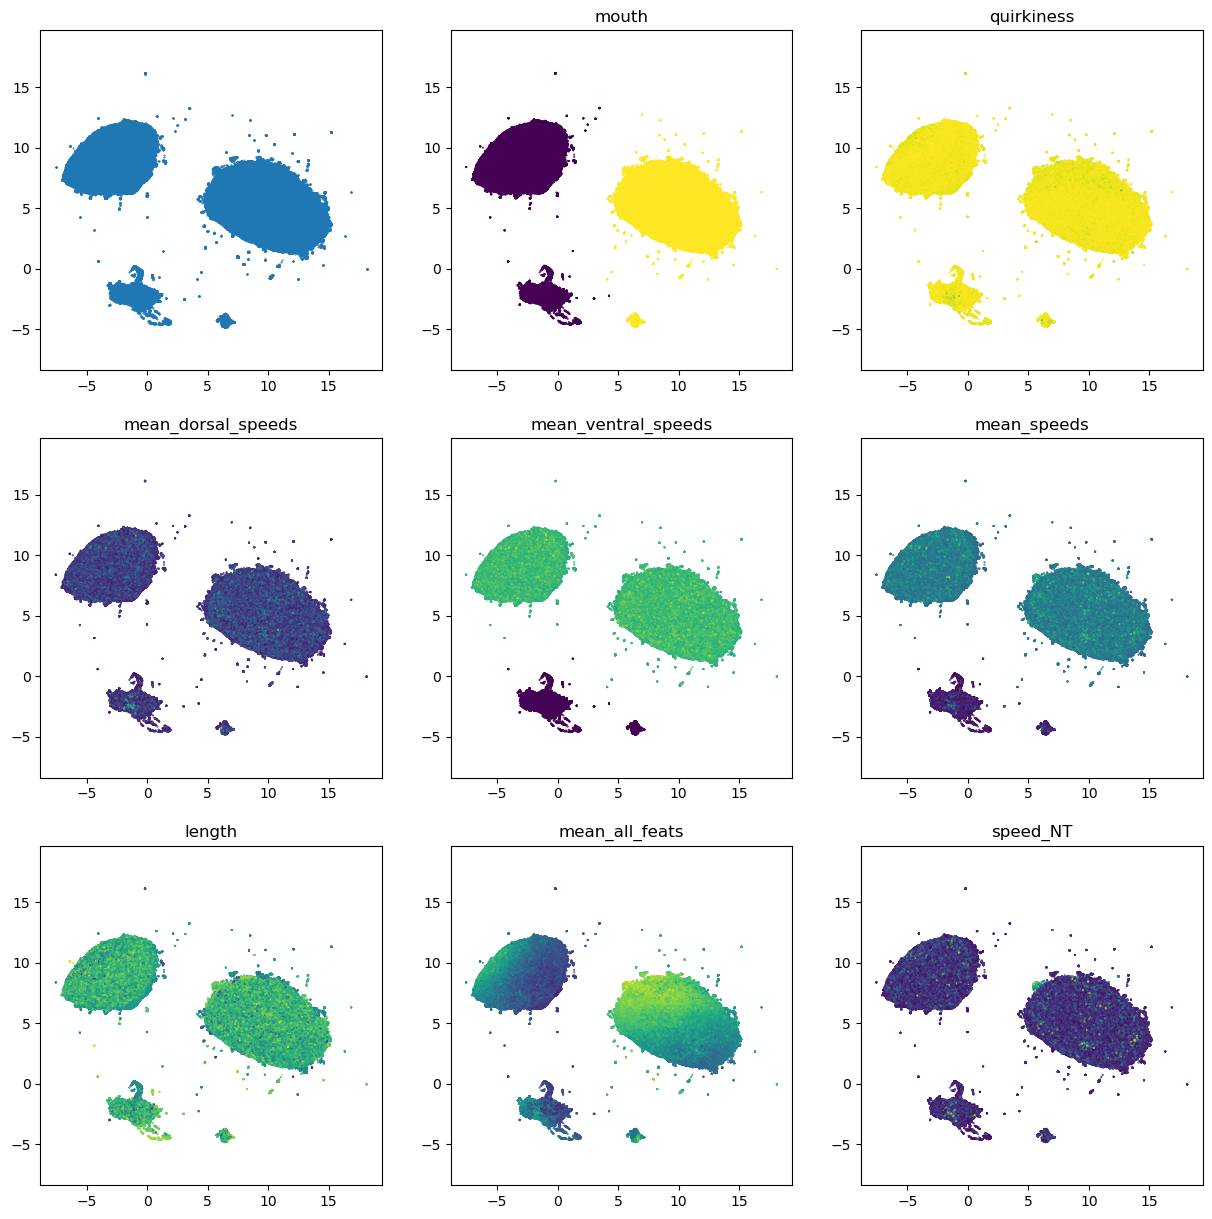

In [265]:
fig, axes = plt.subplots(3,3, figsize=(15,15))
axes= axes.ravel()
axes[0].scatter(embedding[:, 0],embedding[:, 1], s=0.2)

hue_feats = {'mouth': df_sampled['MOUTH'],
             'quirkiness': df_sampled['quirkiness'],
             'mean_dorsal_speeds': df_sampled.filter(like='speed_d').mean(axis=1),
             'mean_ventral_speeds': df_sampled.filter(like='speed_v').mean(axis=1),
             'mean_speeds': df_sampled.filter(like='speed_').mean(axis=1),
             'length': df_sampled['len_sum_of_parts'],
             'mean_all_feats': df_sampled.mean(axis=1),
             'speed_NT': df_sampled['speed_NT'],
             # 'mean_curv': df_sampled.filter(like='curv').pow(2).mean(axis=1),
            }

for i, key_hue in enumerate(hue_feats.keys()):
    axes[i+1].scatter(embedding[:, 0],embedding[:, 1], c= hue_feats[key_hue], s=0.2)
    axes[i+1].set_title(key_hue)
for ax in axes:  
    ax.set_aspect('equal', 'datalim')

# PCA of features

In [206]:
from sklearn.decomposition import PCA

In [208]:
pca = PCA()
pca.fit(df.filter(like='curv'))

PCA()

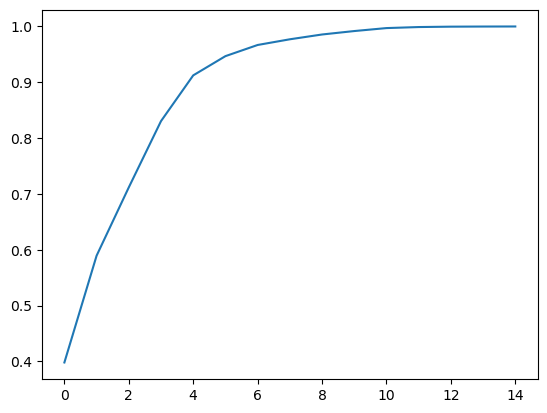

In [211]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [266]:
pca1 = PCA()
pca1.fit(df.filter(like='speed_VT'))

PCA()

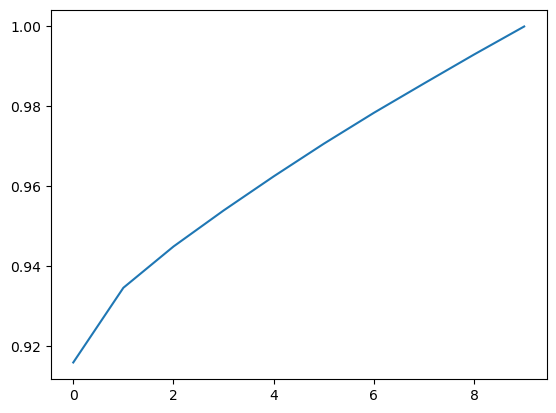

In [267]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_))